In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")

In [3]:
test=pd.read_csv("test.csv")
test_ids=test['PassengerId']

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.isnull().sum()/len(train)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [7]:
train['Age'].mean()

28.82793046746535

<Axes: xlabel='Transported', ylabel='count'>

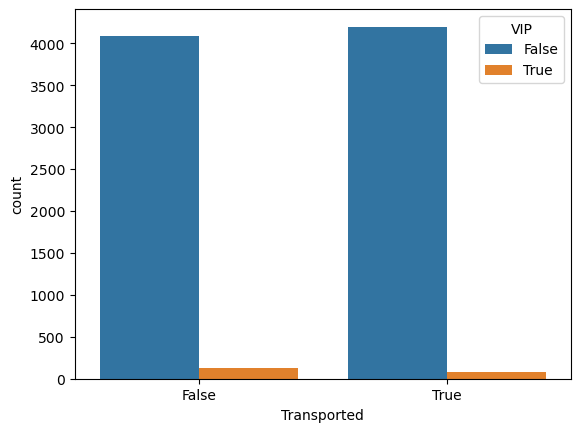

In [8]:
sns.countplot(x=train['Transported'],hue=train['VIP'])

In [9]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [10]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [11]:
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['PassengerId','Name'],axis=1)

<Axes: >

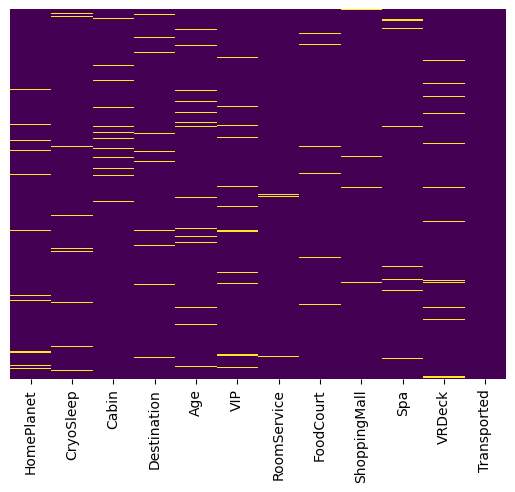

In [12]:
sns.heatmap(train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

<Axes: xlabel='VIP', ylabel='Age'>

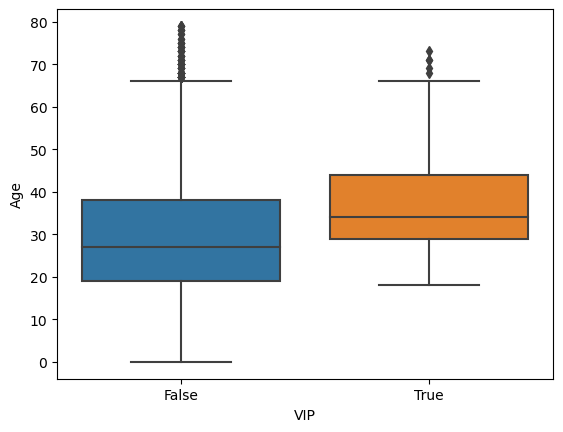

In [13]:
sns.boxplot(x=train['VIP'],y=train['Age'])

In [14]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [15]:
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].apply(lambda n:n.mean())

RoomService     224.687617
FoodCourt       458.077203
ShoppingMall    173.729169
Spa             311.138778
VRDeck          304.854791
dtype: float64

In [16]:
(train.fillna(train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].apply(lambda n:n.mean()),inplace=True))
test.fillna(test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].apply(lambda n:n.mean()),inplace=True)

In [17]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [18]:
train['Age'].mean()

28.82793046746535

In [19]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<Axes: xlabel='Age', ylabel='Count'>

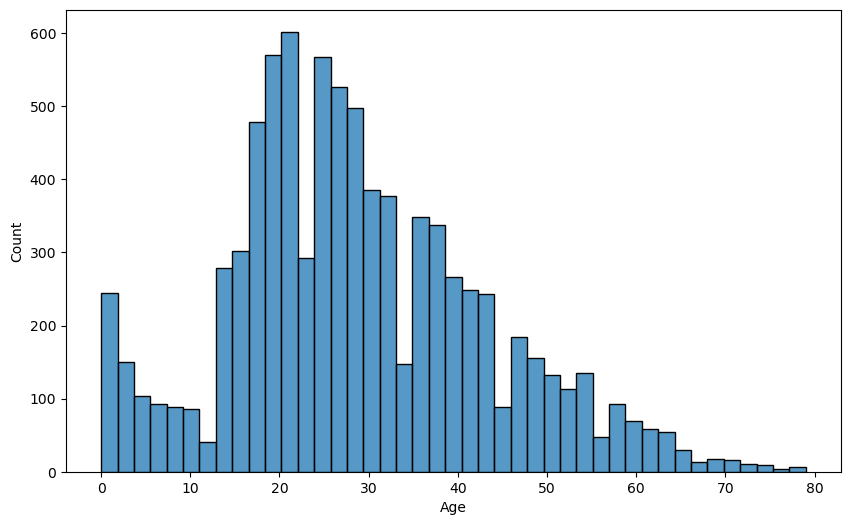

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['Age'])

In [21]:
train.dropna(subset=['Cabin'],inplace=True)
test.dropna(subset=['Cabin'],inplace=True)

In [22]:
train['Cabin']=train['Cabin'].apply(lambda n:n.split("/")[0])
test['Cabin']=test['Cabin'].apply(lambda n:n.split("/")[0])

In [23]:
train.groupby('Cabin').mean()['Age']

C:\Users\ameta\AppData\Local\Temp\ipykernel_2928\2284564880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Cabin').mean()['Age']


Cabin
A    35.161943
B    33.622715
C    34.886145
D    33.518201
E    30.068925
F    28.430495
G    24.062775
T    37.000000
Name: Age, dtype: float64

In [24]:
train[train['Age'].isnull()==True]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
50,Earth,False,G,TRAPPIST-1e,NaN,False,4.0,0.0,2.000000,4683.0,0.0,False
64,Mars,False,E,TRAPPIST-1e,NaN,False,793.0,0.0,2.000000,253.0,0.0,False
137,Earth,True,G,55 Cancri e,NaN,False,0.0,0.0,0.000000,0.0,0.0,True
181,Europa,False,A,55 Cancri e,NaN,False,0.0,2433.0,173.729169,878.0,443.0,True
184,Europa,False,C,55 Cancri e,NaN,False,2.0,1720.0,12.000000,1125.0,122.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8274,Earth,True,G,TRAPPIST-1e,NaN,False,0.0,0.0,0.000000,0.0,0.0,False
8301,Europa,True,C,TRAPPIST-1e,NaN,False,0.0,0.0,0.000000,0.0,0.0,True
8374,Earth,False,G,TRAPPIST-1e,NaN,False,194.0,1.0,10.000000,629.0,0.0,False
8407,Earth,True,G,TRAPPIST-1e,NaN,False,0.0,0.0,0.000000,0.0,0.0,True


In [25]:
def Agefinder(Age,Cabin):
    if(pd.isnull(Age)):
        if(Cabin=='A'):
            return 35
        elif(Cabin=='B'):
            return 33
        elif(Cabin=='C'):
            return 34
        elif(Cabin=='D'):
            return 33
        elif(Cabin=='E'):
            return 30
        elif(Cabin=='F'):
            return 28
        elif(Cabin=='G'):
            return 24
        else:
            return 37
    else:
        return Age

In [26]:
train['Age']=train.apply(lambda x:Agefinder(x['Age'],x['Cabin']),axis=1).astype(int)
test['Age']=test.apply(lambda x:Agefinder(x['Age'],x['Cabin']),axis=1).astype(int)

In [27]:
train[train['CryoSleep'].isnull()==True]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
92,Earth,NaN,G,TRAPPIST-1e,2,False,0.0,0.0,0.0,0.0,0.000000,True
98,Earth,NaN,F,TRAPPIST-1e,27,False,0.0,0.0,570.0,2.0,131.000000,False
104,Europa,NaN,B,TRAPPIST-1e,40,False,0.0,331.0,0.0,0.0,1687.000000,False
111,Mars,NaN,F,TRAPPIST-1e,26,False,0.0,0.0,0.0,0.0,304.854791,True
152,Earth,NaN,E,TRAPPIST-1e,58,False,0.0,985.0,0.0,5.0,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8620,Europa,NaN,C,55 Cancri e,44,False,0.0,0.0,0.0,0.0,0.000000,True
8651,Earth,NaN,G,TRAPPIST-1e,8,False,0.0,0.0,0.0,0.0,0.000000,False
8664,Earth,NaN,G,TRAPPIST-1e,32,False,0.0,0.0,0.0,0.0,0.000000,True
8675,Earth,NaN,F,TRAPPIST-1e,44,False,1030.0,1015.0,0.0,11.0,304.854791,True


In [28]:
train.isnull().sum()

HomePlanet      195
CryoSleep       210
Cabin             0
Destination     178
Age               0
VIP             197
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [29]:
train.isnull().sum()/len(train)

HomePlanet      0.022957
CryoSleep       0.024723
Cabin           0.000000
Destination     0.020956
Age             0.000000
VIP             0.023193
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Transported     0.000000
dtype: float64

In [30]:
train[['HomePlanet','CryoSleep','Destination','VIP']]

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False
...,...,...,...,...
8688,Europa,False,55 Cancri e,True
8689,Earth,True,PSO J318.5-22,False
8690,Earth,False,TRAPPIST-1e,False
8691,Europa,False,55 Cancri e,False


<Axes: xlabel='HomePlanet', ylabel='count'>

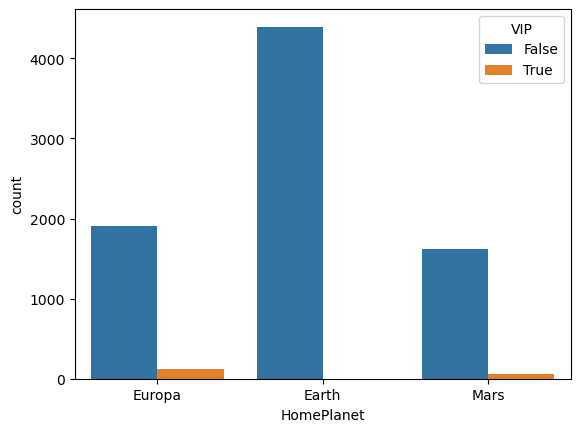

In [31]:
sns.countplot(x=train['HomePlanet'],hue=train['VIP'])

In [32]:
train=train.fillna(method='bfill')
test=test.fillna(method='bfill')

In [33]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [34]:
train.fillna(method='bfill')
test.fillna(method='bfill')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G,TRAPPIST-1e,27,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F,TRAPPIST-1e,19,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C,55 Cancri e,31,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C,TRAPPIST-1e,38,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F,TRAPPIST-1e,20,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4271,Earth,False,F,TRAPPIST-1e,40,False,0.0,865.0,0.0,3.0,0.0
4272,Earth,True,G,TRAPPIST-1e,34,False,0.0,0.0,0.0,0.0,0.0
4274,Mars,True,D,55 Cancri e,33,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D,PSO J318.5-22,33,False,0.0,2680.0,0.0,0.0,523.0


In [41]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,1,2,39,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,5,2,24,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,5,2,16,0,303.0,70.0,151.0,565.0,2.0,1


In [44]:
test['Cabin'].unique()

array(['G', 'F', 'C', 'B', 'D', 'E', 'A', 'T'], dtype=object)

In [36]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [37]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
cols=['Cabin','VIP','Transported','HomePlanet','CryoSleep','Destination']
le=LabelEncoder()
for col in cols:
    train[col]=le.fit_transform(train[col])
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,1,2,39,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,5,2,24,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,5,2,16,0,303.0,70.0,151.0,565.0,2.0,1


In [45]:
cols=['Cabin','VIP','HomePlanet','CryoSleep','Destination']
for col in cols:
    test[col]=le.fit_transform(test[col])

In [46]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,6,2,27,0,0.0,0.0,0.0,0.0,0.0
1,0,0,5,2,19,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,2,0,31,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,2,38,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,5,2,20,0,10.0,0.0,635.0,0.0,0.0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [49]:
X=train.drop('Transported',axis=1)
y=train['Transported']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression().fit(X_train,y_train)

C:\Users\ameta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
predicitons=model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predicitons))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1287
           1       0.79      0.80      0.80      1262

    accuracy                           0.80      2549
   macro avg       0.80      0.80      0.80      2549
weighted avg       0.80      0.80      0.80      2549

